In [384]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [387]:
from portfolio_design.src.portfolio_builder.portfolio import Portfolio

# Investment Parameters

**How long is the period you want to invest for?**

In [352]:
H_years = 2
H_months = H_years * 12
print(f'Your investment horizon is {H_years} years or {H_months} months')

Your investment horizon is 2 years or 24 months


**How much do you need at the end of the investment?**

In [353]:
T = 14000

**How much will you contribute to the investment?**

In [380]:
initial_investment = 10000
T_return = T / initial_investment - 1
T_monthly_return = (1 + T_return)**(1 / H_months) - 1

print(f'You will need to generate a total return of {T_return:.1%} or {T_monthly_return:.1%} per month')

You will need to generate a total return of 40.0% or 1.4% per month


In [381]:
payment_per_month = T / H_months
payment_per_month

583.3333333333334

# Portfolio Parameters

**List the assets in the proposed portfolio:**

In [511]:
portfolio_assets = [
  'DHR',
  'COST',
  'SOXX'
]

portfolio = Portfolio(portfolio_assets)

[*********************100%***********************]  3 of 3 completed


/Users/calvindelima/projects/investing/.venv/lib/python3.9/site-packages/pandas/core/generic.py:4152: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


# Portfolio Stats

## Returns

In [509]:
portfolio_return_stats = portfolio.compute_return_stats(H_months)
portfolio_rate_of_return = portfolio_return_stats['mean'].mean().round(3)
portfolio_return = portfolio_rate_of_return * initial_investment
portfolio_annualized_return = portfolio.compute_annualized_returns(
  from_date = '2015-01-01',
  n_annual_periods = 1
).mean()


print(
  f'Your expected rate of return for an equal weighted portfolio is {portfolio_rate_of_return:.1%}'
)
print()
print(
  f'Your expected return on an equal weighted portfolio is {portfolio_return:.1}'
)
print()
print(
  f'Your expected annualized return for an equal weighted portfolio is {portfolio_annualized_return:.1%}'
)

Your expected rate of return for an equal weighted portfolio is 36.4%

Your expected return on an equal weighted portfolio is 4e+03

Your expected annualized return for an equal weighted portfolio is 22.0%


In [521]:
sharpe_ratios = portfolio.compute_risk_adjusted_returns(
  from_date = '2015-01-01',
  riskfree_rate = 0.00374
)
sharpe_ratio_mean = sharpe_ratios.mean().round(3) - 1
print(
  f'Your expected risk-adjusted rate of return for an equal weighted portfolio is {sharpe_ratio_mean:.1%}'
)

Your expected risk-adjusted rate of return for an equal weighted portfolio is 11.7%


## Volatility

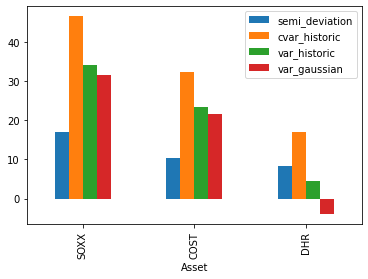

In [491]:
portfolio_volatility = portfolio.compute_volatility(H_months, as_percent = True)
portfolio_volatility.plot.bar();